In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

### Preproccessing the data

In [52]:
df = pd.read_csv("data/facebook_reviews.csv")

In [53]:
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,aa14afbe-b885-483b-bfd4-ce0710742b7c,Ni WarLin,Like,5,0,463.1.0.53.85,2024-05-11 22:11:06,463.1.0.53.85
1,770414f8-e14d-4b87-9257-310ebb0eae82,Airesh Nacaytuna,Great apps gustong gusto koto na apps,5,0,NaN,2024-05-11 22:11:02,NaN
2,212c58a0-e3e1-4fdd-9d5a-42d0c3932c13,Ram Milan,Eeßu,1,0,463.1.0.53.85,2024-05-11 22:10:30,463.1.0.53.85
3,a907d3ab-a99f-477d-9b50-4a870643e993,Sani Bk,shisi,1,0,436.0.0.35.101,2024-05-11 22:09:50,436.0.0.35.101
4,0132e4b0-0e97-4abc-a4b1-a3a07e990046,snake plissken,Not sure whats happened over the last week or ...,2,2,463.1.0.53.85,2024-05-11 22:09:07,463.1.0.53.85
...,...,...,...,...,...,...,...,...
43479,d7816c49-b04a-4069-b9f9-25e63d069a41,Deepak thakur Deepak thakur,nice video,5,0,NaN,2024-05-08 00:07:55,NaN
43480,c23d2b31-4c97-41de-867c-3f5ef3a61d0d,Joseph Leblanc,love it!!!,5,0,462.0.0.47.85,2024-05-08 00:07:38,462.0.0.47.85
43481,01bdb728-5042-4a8f-b207-8a02263c7b3e,Christian Kelechi,Good work is confirmed,5,0,361.0.0.39.115,2024-05-08 00:07:31,361.0.0.39.115
43482,a5207278-bc25-4bbb-b999-004407519b81,Mankhush Abinash,I NH by t um TV ex RV hu by,1,0,462.0.0.47.85,2024-05-08 00:04:41,462.0.0.47.85


In [54]:
df.shape[0]

43484

In [55]:
df = df.dropna(subset=['content', 'score'])

In [56]:
df.shape[0]

43479

In [57]:
description = df.groupby('score').describe()
description

thumbsUpCount                                                        
              count        mean          std  min  25%  50%   75%       max
score                                                                      
1           17787.0  197.914432  1599.246155  0.0  0.0  0.0   7.0  110743.0
2            4038.0  277.774641  1689.182606  0.0  0.0  1.0  13.0   34632.0
3            3265.0  185.093721  1532.849272  0.0  0.0  0.0   5.0   40281.0
4            2629.0  100.893496  1177.997102  0.0  0.0  0.0   1.0   40484.0
5           15760.0   17.897462   519.464631  0.0  0.0  0.0   0.0   31127.0

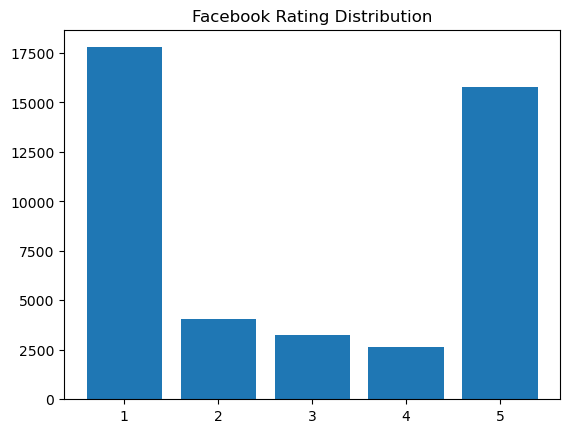

In [58]:
plt.bar(np.arange(0, 5), height= [17787.0, 4038.0, 3265.0, 2630.0, 15764.0])
plt.title('Facebook Rating Distribution')
plt.xticks(np.arange(0, 5), ['1','2','3','4','5']);

### Beginning the machine learning

In [59]:
X = df['content']
y = df['score']

In [60]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25)

In [61]:
ctvct = CountVectorizer()

In [62]:
X_train_count = ctvct.fit_transform(X_train.values)

In [63]:
X_train_count

<32609x21555 sparse matrix of type '<class 'numpy.int64'>'
	with 723156 stored elements in Compressed Sparse Row format>

In [64]:
multiNB = MultinomialNB()
multiNB.fit(X_train_count, y_train)

MultinomialNB()

In [65]:
X_test_count = ctvct.transform(X_test.values)

In [66]:
multiNB.score(X_test_count, y_test)

0.6850045998160074

### Classification report

In [67]:
y_pred = multiNB.predict(X_test_count)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.92      0.75      4466
           2       0.31      0.05      0.09       978
           3       0.38      0.04      0.07       813
           4       0.67      0.05      0.10       692
           5       0.78      0.82      0.80      3921

    accuracy                           0.69     10870
   macro avg       0.56      0.38      0.36     10870
weighted avg       0.64      0.69      0.62     10870



### Does Bernoulli Naive Bayes do any better?

In [68]:
bernNB = BernoulliNB()
bernNB.fit(X_train_count, y_train)
bernNB.score(X_test_count, y_test)

0.6456301747930083

### No, it does not

### Let's optimize some hyperparameters

In [69]:
def do_Kfold(model,X,y,k,scaler = None, random_state = 146):
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=k, random_state = random_state, shuffle=True)

    train_scores = []
    test_scores = []

    for idxTrain, idxTest in kf.split(X):
        Xtrain = X[idxTrain, :]
        Xtest = X[idxTest, :]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
        if scaler != None:
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        model.fit(Xtrain,ytrain)

        train_scores.append(model.score(Xtrain,ytrain))
        test_scores.append(model.score(Xtest,ytest))
        
    return train_scores, test_scores

In [70]:
alpha_range = np.linspace(0.01, 20, 10)
train=[]
test=[]
for alpha in alpha_range:
    multiNB.fit(X_train_count, y_train)
    train.append(multiNB.score(X_train_count, y_train))
    test.append(multiNB.score(X_test_count, y_test))
    

In [71]:
train

[0.7378024471771597,
 0.7378024471771597,
 0.7378024471771597,
 0.7378024471771597,
 0.7378024471771597,
 0.7378024471771597,
 0.7378024471771597,
 0.7378024471771597,
 0.7378024471771597,
 0.7378024471771597]

In [72]:
test

[0.6850045998160074,
 0.6850045998160074,
 0.6850045998160074,
 0.6850045998160074,
 0.6850045998160074,
 0.6850045998160074,
 0.6850045998160074,
 0.6850045998160074,
 0.6850045998160074,
 0.6850045998160074]

### The alpha is already optimal

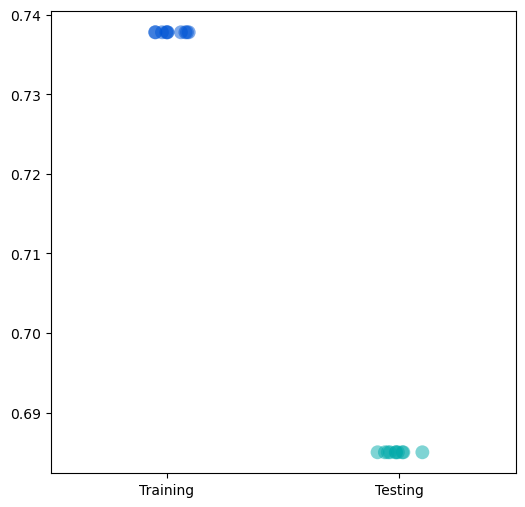

In [73]:
plt.figure(figsize = (6,6))
sns.stripplot(data = pd.DataFrame(zip(train,test), columns = ['Training', 'Testing']), size=10, palette = 'winter',
             alpha = 0.5, jitter = True)
plt.show()

### The model is a bit overfit

### Let's try some real inputs

In [74]:
message_1 = ctvct.transform(['This is a great app!'])
multiNB.predict(message_1)

array([5])

In [75]:
message_2 = ctvct.transform(['This is an awful app!'])
multiNB.predict(message_2)

array([1])

In [76]:
message_3 = ctvct.transform(['This is app is not bad, but not great.'])
multiNB.predict(message_3)

array([1])

In [77]:
message_4 = ctvct.transform(['It is pretty decent, but has some bugs.'])
multiNB.predict(message_4)

array([1])

In [78]:
message_5 = ctvct.transform(['bad'])
multiNB.predict(message_5)

array([1])

In [79]:
message_6 = ctvct.transform(['bad, good'])
multiNB.predict(message_6)

array([5])

In [80]:
message_7 = ctvct.transform(['bad, good, bad, bad.'])
multiNB.predict(message_7)

array([5])

In [81]:
message_8 = ctvct.transform(['bad, good, bad, bad, bad.'])
multiNB.predict(message_8)

array([5])

In [83]:
message_9 = ctvct.transform(['bad, good, major bugs'])
multiNB.predict(message_9)

array([1])

#### It is interesting to see the weight that the machine assigns to the words, and how that affects the classification.